# Data Intialization

In [1]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing

# import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(18,6))

# import libraries for machine learning (decision tree)
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

<Figure size 1296x432 with 0 Axes>

In [2]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.naive_bayes import GaussianNB

In [3]:
data = pd.read_csv('ECommerce_Cleansed.csv', index_col = 'CustomerID')
features = list(data.columns)[1:]
target = list(data.columns)[0]

In [4]:
X = data.drop(['Churn'],axis='columns',inplace=False)
y = data['Churn']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state =42)

# Machine Learning - Gaussian Naive Bayes

In [6]:
gnb = GaussianNB()
pred_y = cross_val_predict(gnb,X_test,y_test,cv=10)
score = cross_val_score(gnb,X_test,y_test,cv=10)

In [7]:
pred_val_maj_zero = np.zeros((1689,),dtype=int)
pred_val_maj_one = np.ones((1689,),dtype=int)

# Evaluation

In [8]:
print("Accuracy of Naive Bayes Model:","\n", accuracy_score(y_test, pred_y, normalize=True, sample_weight=None))
print()
print("Confusion Matrix of Naive Bayes Model:", "\n", confusion_matrix(y_test, pred_y))
print()
print("Classification Report of Naive Bayes Model:","\n",classification_report(y_test, pred_y))

Accuracy of Naive Bayes Model: 
 0.7572528123149793

Confusion Matrix of Naive Bayes Model: 
 [[1106  308]
 [ 102  173]]

Classification Report of Naive Bayes Model: 
               precision    recall  f1-score   support

           0       0.92      0.78      0.84      1414
           1       0.36      0.63      0.46       275

    accuracy                           0.76      1689
   macro avg       0.64      0.71      0.65      1689
weighted avg       0.83      0.76      0.78      1689



In [20]:
print("Accuracy of Benchmark Model 0:","\n", accuracy_score(y_test , pred_val_maj_zero , normalize=True, sample_weight=None))
print()
print("Confusion Matrix of Benchmark Model 0:", "\n", confusion_matrix(y_test, pred_val_maj_zero))
print()
print("Classification Report of Benchmark Model 0:", "\n", classification_report(y_test, pred_val_maj_zero))

Accuracy of Benchmark Model 0: 
 0.837181764357608

Confusion Matrix of Benchmark Model 0: 
 [[1414    0]
 [ 275    0]]

Classification Report of Benchmark Model 0: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1414
           1       0.00      0.00      0.00       275

    accuracy                           0.84      1689
   macro avg       0.42      0.50      0.46      1689
weighted avg       0.70      0.84      0.76      1689



C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
print("Accuracy of Benchmark Model:","\n", accuracy_score(y_test, pred_val_maj_one, normalize=True, sample_weight=None))
print()
print("Confusion Matrix of Benchmark Model:", "\n", confusion_matrix(y_test, pred_val_maj_one))
print()
print("Classification Report of Benchmark Model:", "\n", classification_report(y_test, pred_val_maj_one))

Accuracy of Benchmark Model: 
 0.16281823564239195

Confusion Matrix of Benchmark Model: 
 [[   0 1414]
 [   0  275]]

Classification Report of Benchmark Model: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1414
           1       0.16      1.00      0.28       275

    accuracy                           0.16      1689
   macro avg       0.08      0.50      0.14      1689
weighted avg       0.03      0.16      0.05      1689



### ROC / AUC Curve

In [11]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# test model (output probability estimate)
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB.predict_proba
pred_prob = gnb.predict_proba(X_test)


# show the probability of belonging to class 0 and class 1
pred_prob

array([[9.10155549e-04, 9.99089844e-01],
       [9.95587013e-01, 4.41298666e-03],
       [9.72834796e-01, 2.71652037e-02],
       ...,
       [6.32234006e-04, 9.99367766e-01],
       [1.39027076e-02, 9.86097292e-01],
       [7.36823459e-01, 2.63176541e-01]])

In [13]:
pred_prob[:,1]

array([0.99908984, 0.00441299, 0.0271652 , ..., 0.99936777, 0.98609729,
       0.26317654])

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1], pos_label=1)
fpr0, tpr0, thresholds0 = roc_curve(y_test, pred_val_maj_zero, pos_label=1)
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_val_maj_one, pos_label=1)
roc_auc=auc(fpr,tpr)
roc_auc0=auc(fpr0,tpr0)
roc_auc1=auc(fpr1,tpr1)

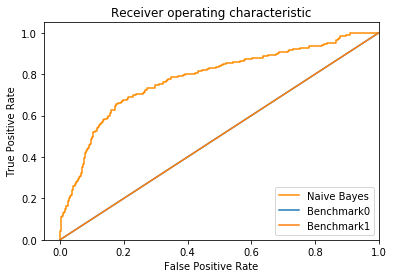

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
lw = 2
plt.plot(fpr, tpr,color='darkorange', label='Naive Bayes')
plt.plot(fpr0, tpr0, label='Benchmark0')
plt.plot(fpr1, tpr1, label='Benchmark1')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Precision-Recall Curve

In [124]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test,  pred_prob[:,1])
precision0, recall0, threshold0 = precision_recall_curve(y_test, pred_val_maj_zero)
precision1, recall1, threshold1 = precision_recall_curve(y_test, pred_val_maj_one)

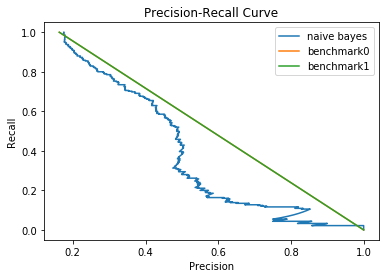

In [125]:
plt.plot(precision,recall, label='naive bayes') 
plt.plot(precision0,recall0, label='benchmark0')
plt.plot(precision1,recall1, label='benchmark1')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.legend()